In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [ ]:
sales_data=pd.read_csv("/content/sales_data_with_discounts.csv")
sales_data

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
sales_data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
sales_data.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
sales_data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


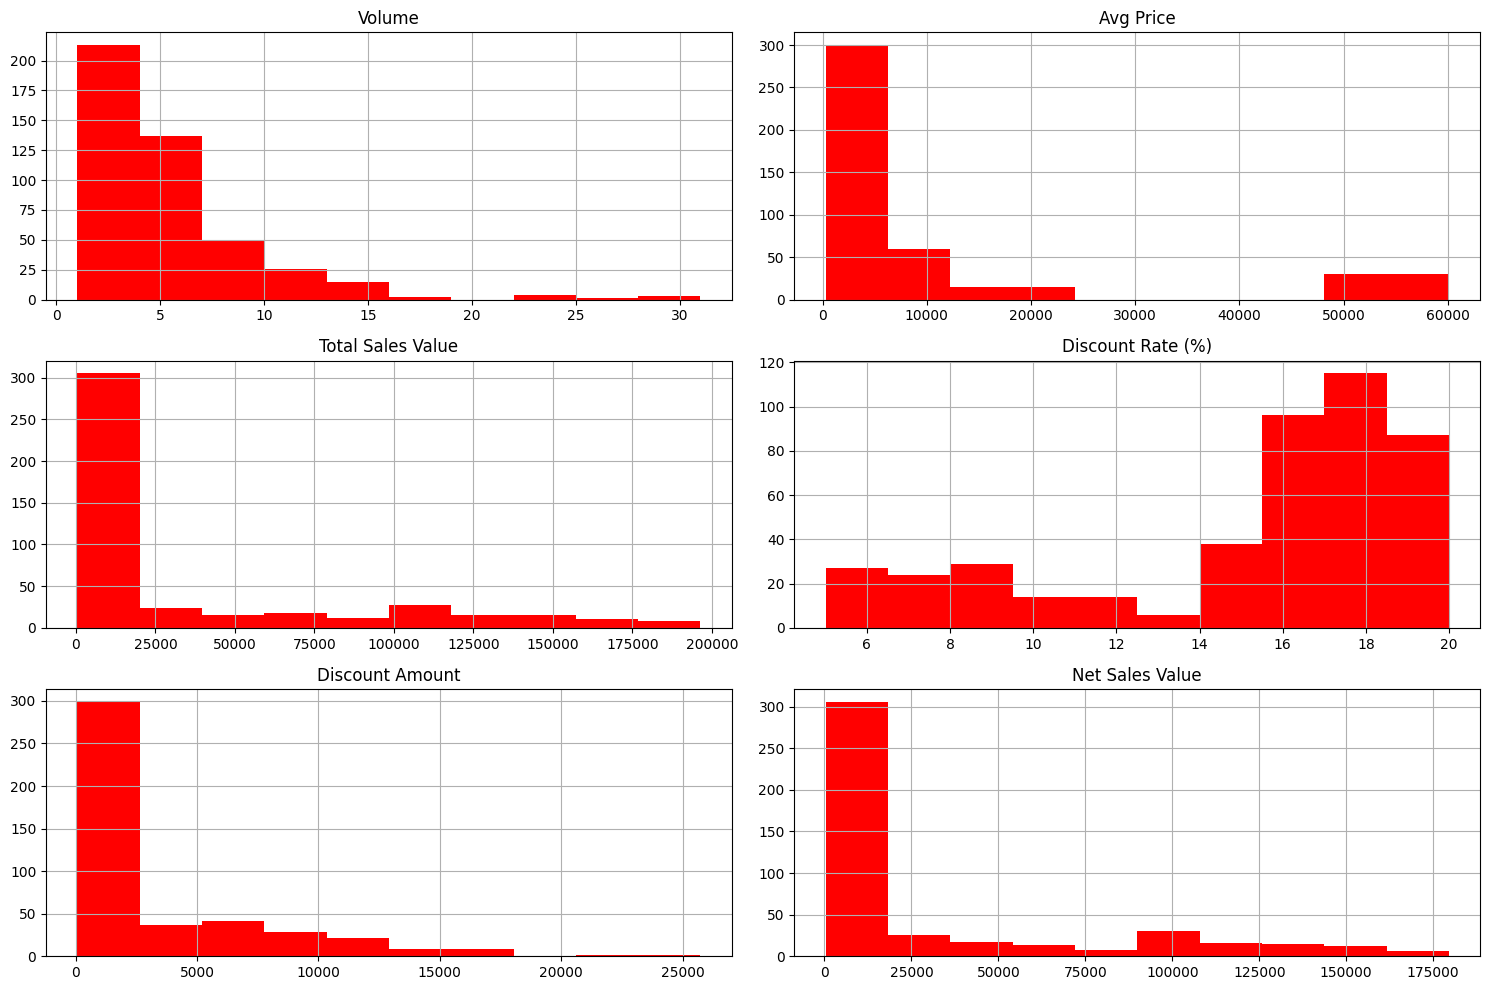

In [ ]:
sales_data.hist(figsize=(15,10),color="red")
plt.tight_layout()
plt.show()

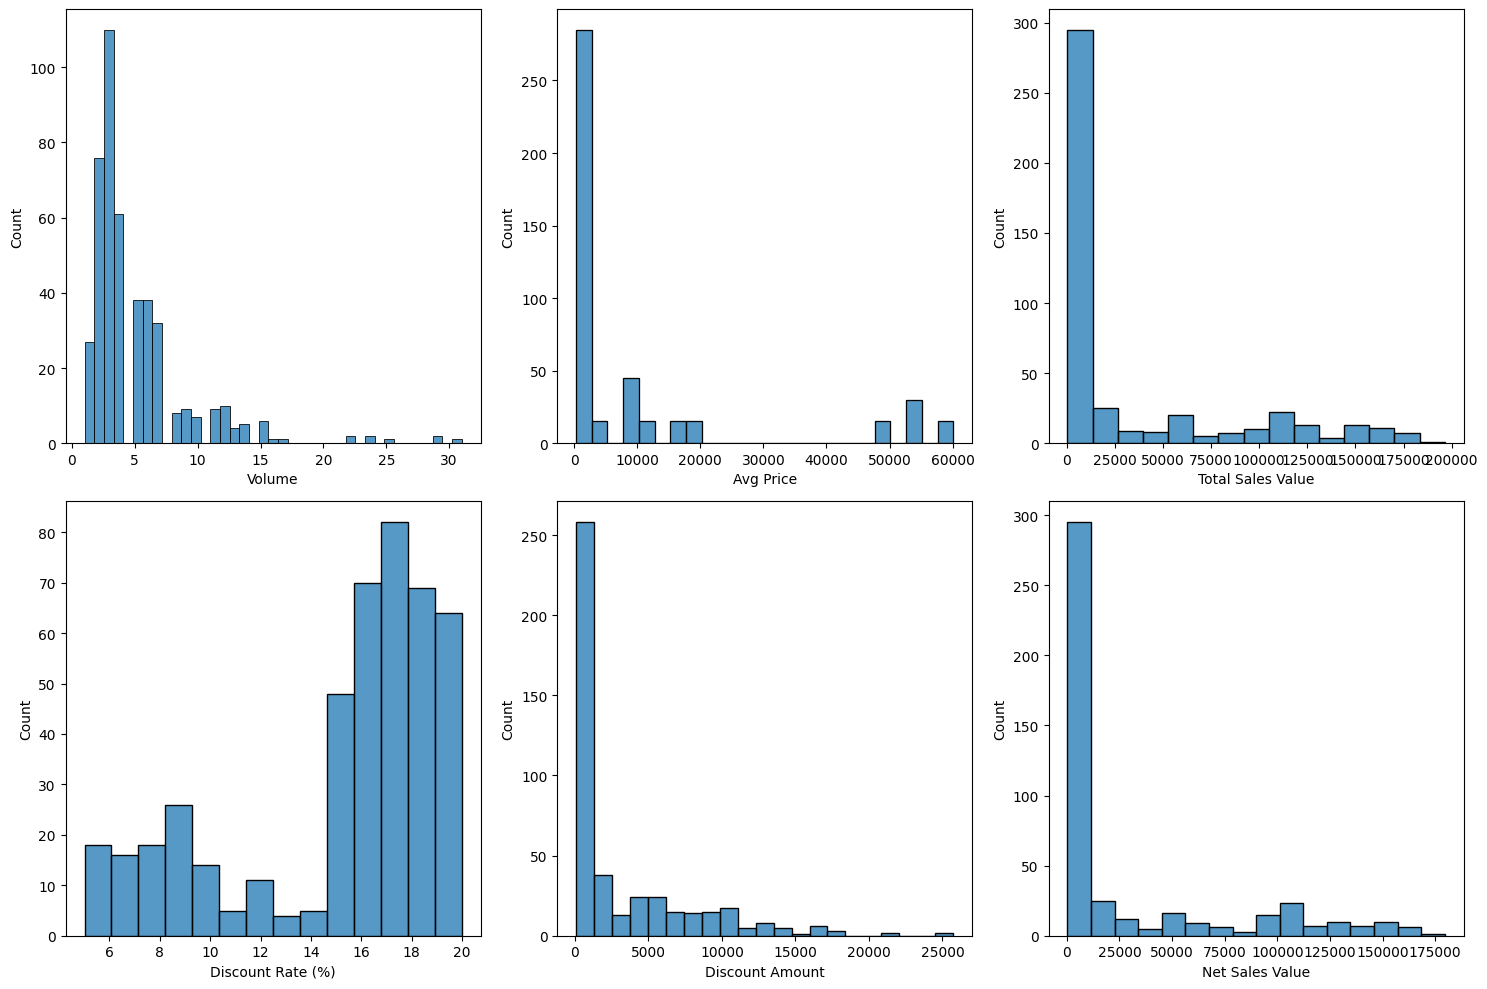

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.histplot(sales_data["Volume"])
plt.xlabel("Volume")

plt.subplot(2,3,2)
sns.histplot(sales_data["Avg Price"])
plt.xlabel("Avg Price")

plt.subplot(2,3,3)
sns.histplot(sales_data["Total Sales Value"])
plt.xlabel("Total Sales Value")

plt.subplot(2,3,4)
sns.histplot(sales_data["Discount Rate (%)"])
plt.xlabel("Discount Rate (%)")

plt.subplot(2,3,5)
sns.histplot(sales_data["Discount Amount"])
plt.xlabel("Discount Amount")

plt.subplot(2,3,6)
sns.histplot(sales_data["Net Sales Value"])
plt.xlabel("Net Sales Value")
plt.tight_layout()
plt.show()

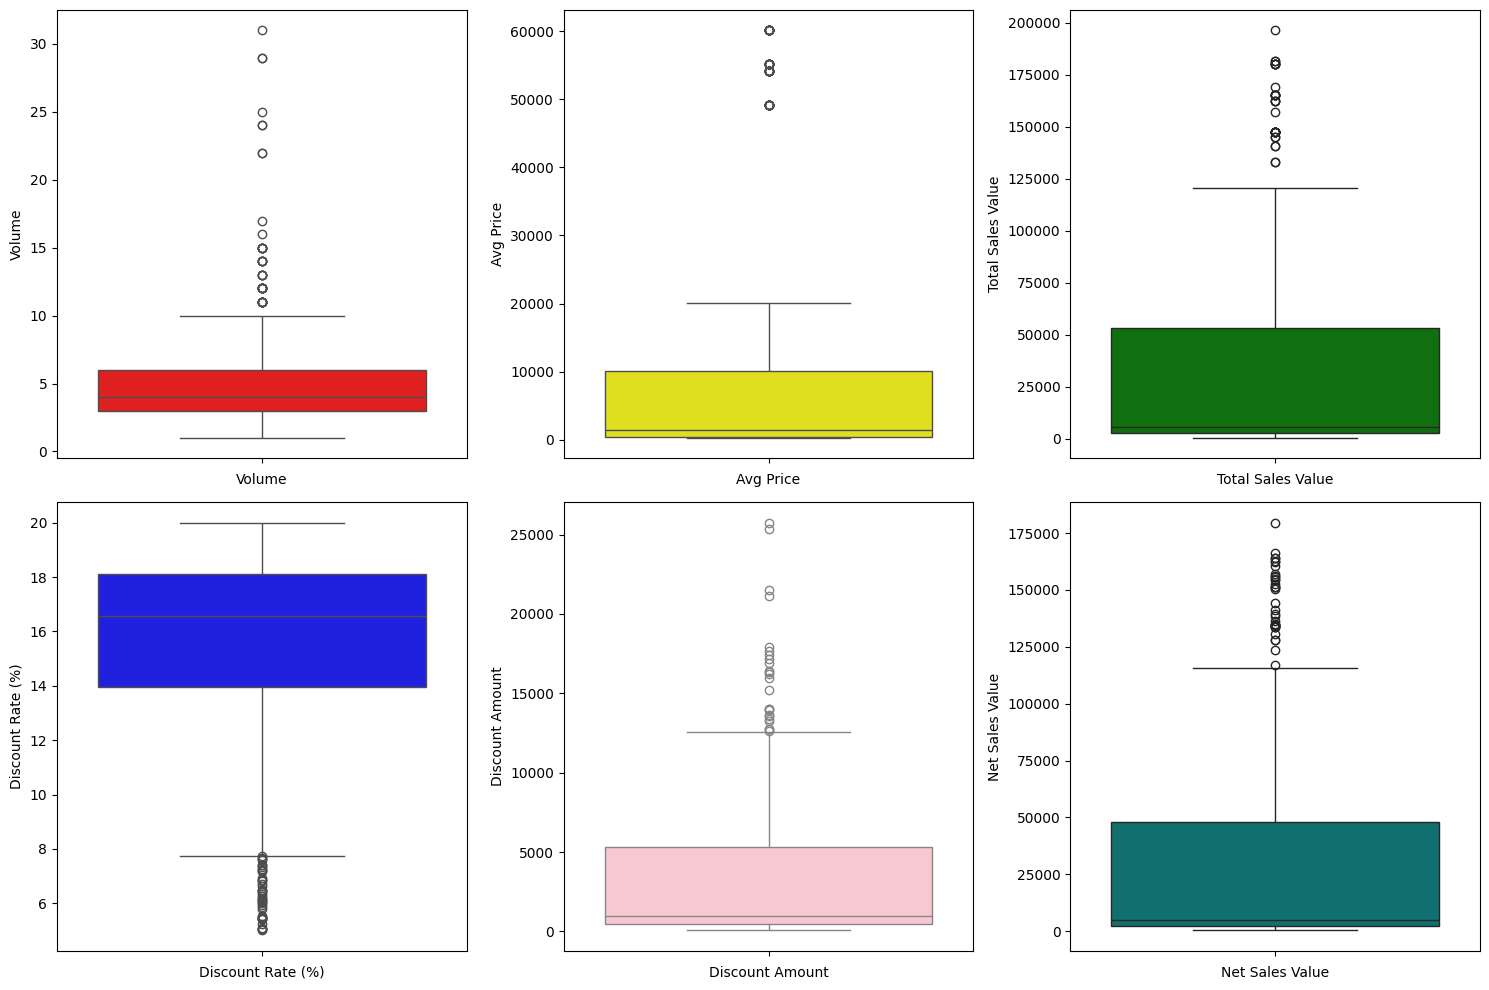

In [ ]:

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(sales_data["Volume"],color="red")
plt.xlabel("Volume")

plt.subplot(2,3,2)
sns.boxplot(sales_data["Avg Price"],color="yellow")
plt.xlabel("Avg Price")

plt.subplot(2,3,3)
sns.boxplot(sales_data["Total Sales Value"],color="green")
plt.xlabel("Total Sales Value")

plt.subplot(2,3,4)
sns.boxplot(sales_data["Discount Rate (%)"],color="blue")
plt.xlabel("Discount Rate (%)")

plt.subplot(2,3,5)
sns.boxplot(sales_data["Discount Amount"],color="pink")
plt.xlabel("Discount Amount")

plt.subplot(2,3,6)
sns.boxplot(sales_data["Net Sales Value"],color="teal")
plt.xlabel("Net Sales Value")
plt.tight_layout()
plt.show()

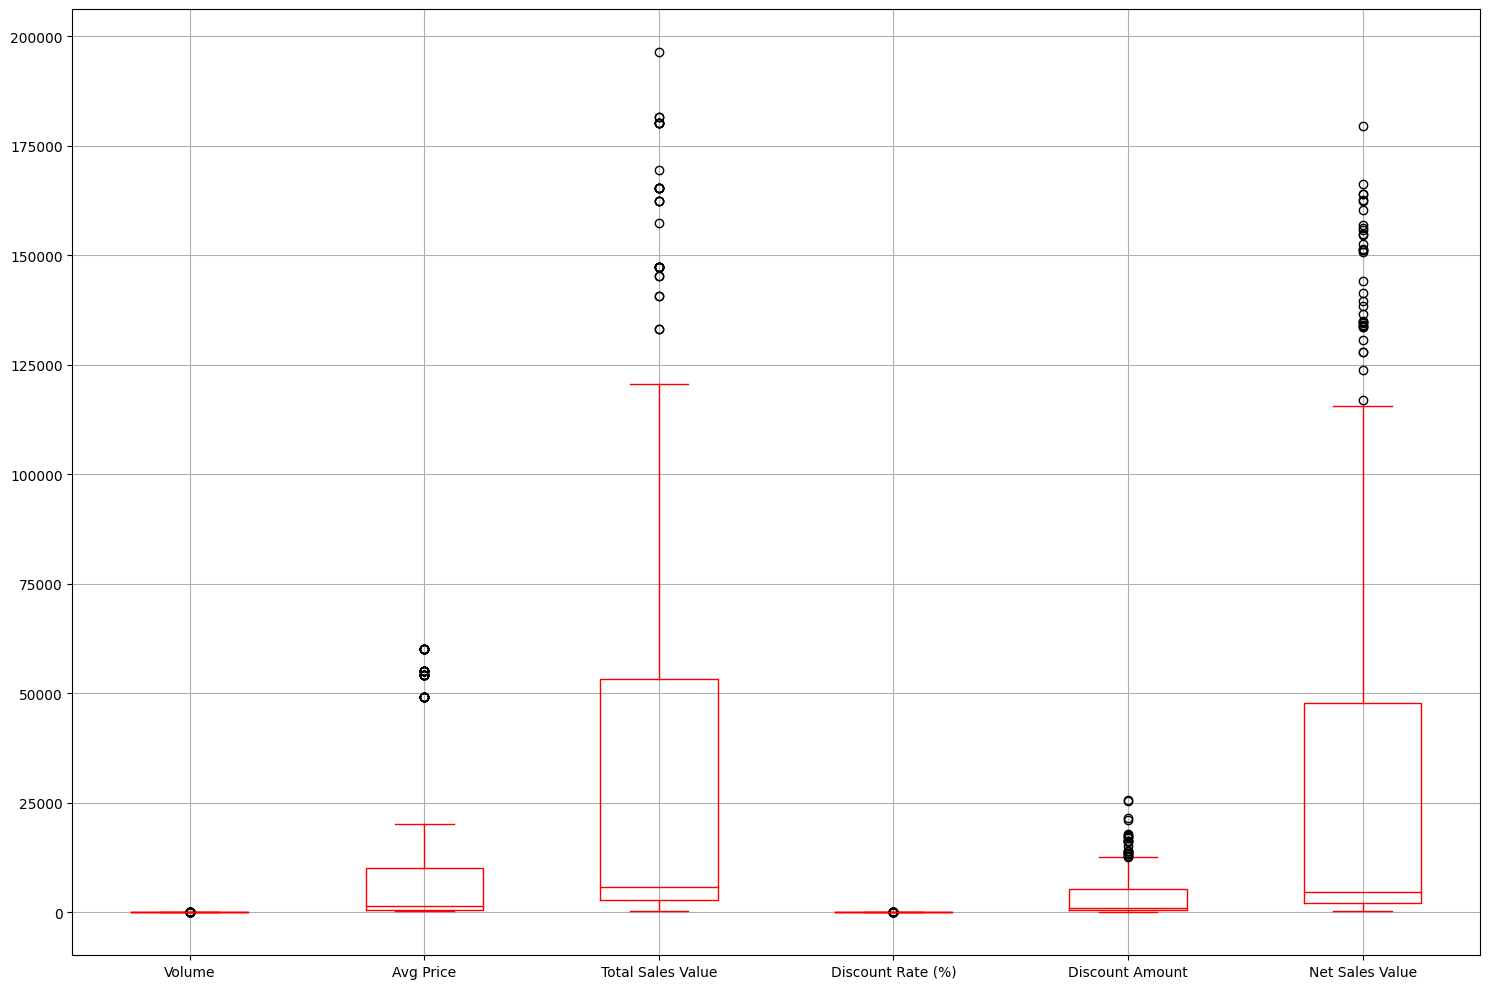

In [ ]:
sales_data.boxplot(figsize=(15,10),color="red")
plt.tight_layout()
plt.show()

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


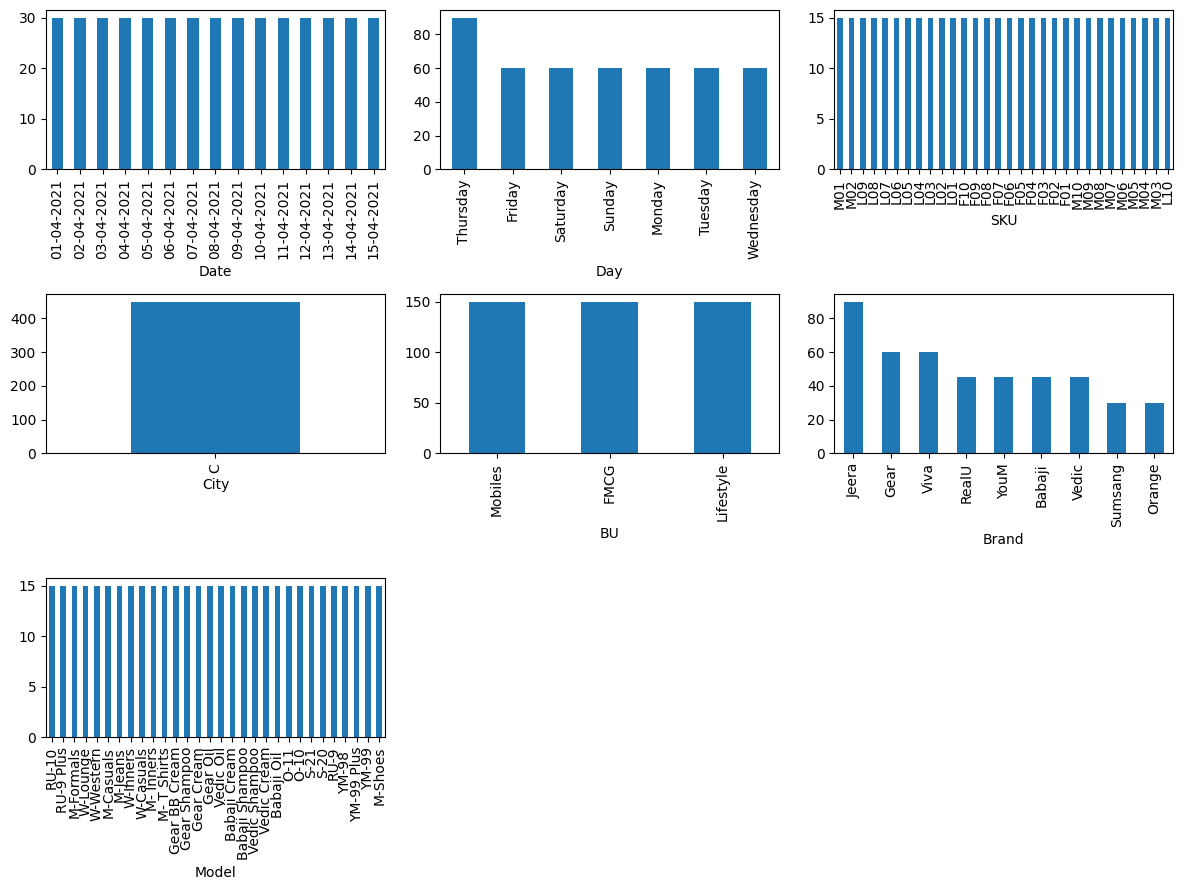

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(3,3,1)
sales_data["Date"].value_counts().plot(kind="bar")

plt.subplot(3,3,2)
sales_data["Day"].value_counts().plot(kind="bar")

plt.subplot(3,3,3)
sales_data["SKU"].value_counts().plot(kind="bar")

plt.subplot(3,3,4)
sales_data["City"].value_counts().plot(kind="bar")

plt.subplot(3,3,5)
sales_data["BU"].value_counts().plot(kind="bar")

plt.subplot(3,3,6)
sales_data["Brand"].value_counts().plot(kind="bar")

plt.subplot(3,3,7)
sales_data["Model"].value_counts().plot(kind="bar")
plt.tight_layout()
plt.show()


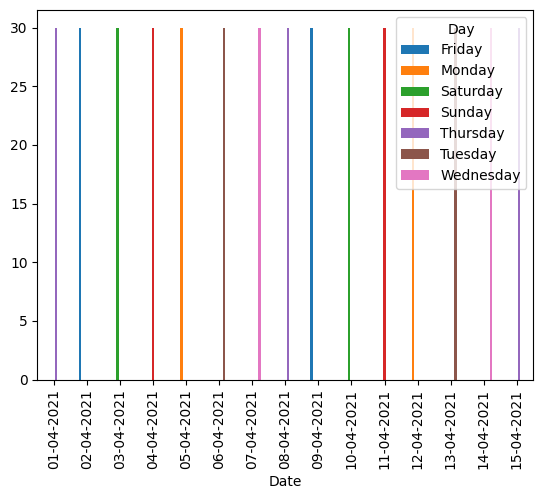

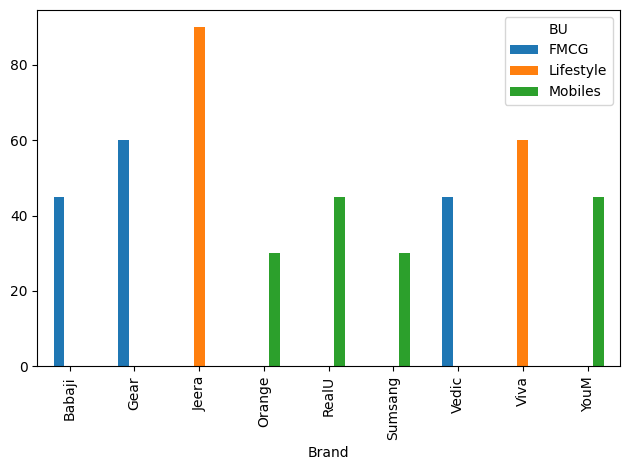

In [ ]:

pd.crosstab(sales_data["Date"],sales_data["Day"]).plot(kind="bar")

pd.crosstab(sales_data["Brand"],sales_data["BU"]).plot(kind="bar")
plt.tight_layout()
plt.show()


In [ ]:
# Identify numerical columns to standardize
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value',
                     'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Standardize the numerical columns using z-score normalization
df_standardized = sales_data.copy()
df_standardized[numerical_columns] = (sales_data[numerical_columns] - sales_data[numerical_columns].mean()) / sales_data[numerical_columns].std()

# Display the summary statistics before and after standardization for comparison
sales_data.describe()



,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
df_standardized

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


In [ ]:
df_standardized.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,4.144833e-17,4.342206e-17,1.578984e-17,-4.144833e-17,-6.315935e-17,1.973730e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00


In [ ]:
# Identifying categorical columns for one-hot encoding
categorical_columns= ['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# Applying one-hot encoding to the categorical columns
encoded_data= pd.get_dummies(sales_data, columns=categorical_columns, drop_first=True)

# Displaying the first few rows of the transformed dataset
encoded_data

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,15-04-2021,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,15-04-2021,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,15-04-2021,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,...,False,False,False,False,False,False,False,False,False,False
